In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="muted")


In [2]:
df = pd.read_csv("Cardiotocographic.csv")


In [3]:
print(df.head())


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
print(df.isnull().sum())


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
df.fillna(df.mean(), inplace=True)

In [7]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


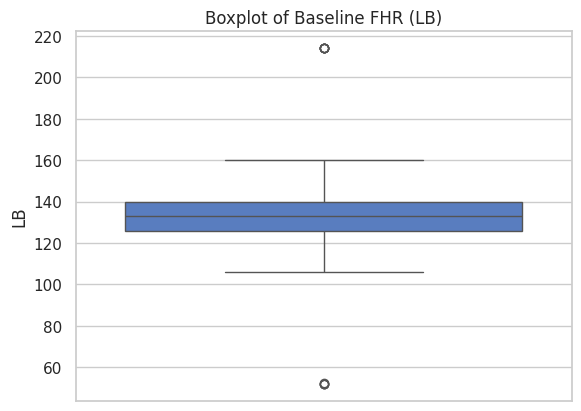

In [8]:
sns.boxplot(y=df['LB'])
plt.title("Boxplot of Baseline FHR (LB)")
plt.show()


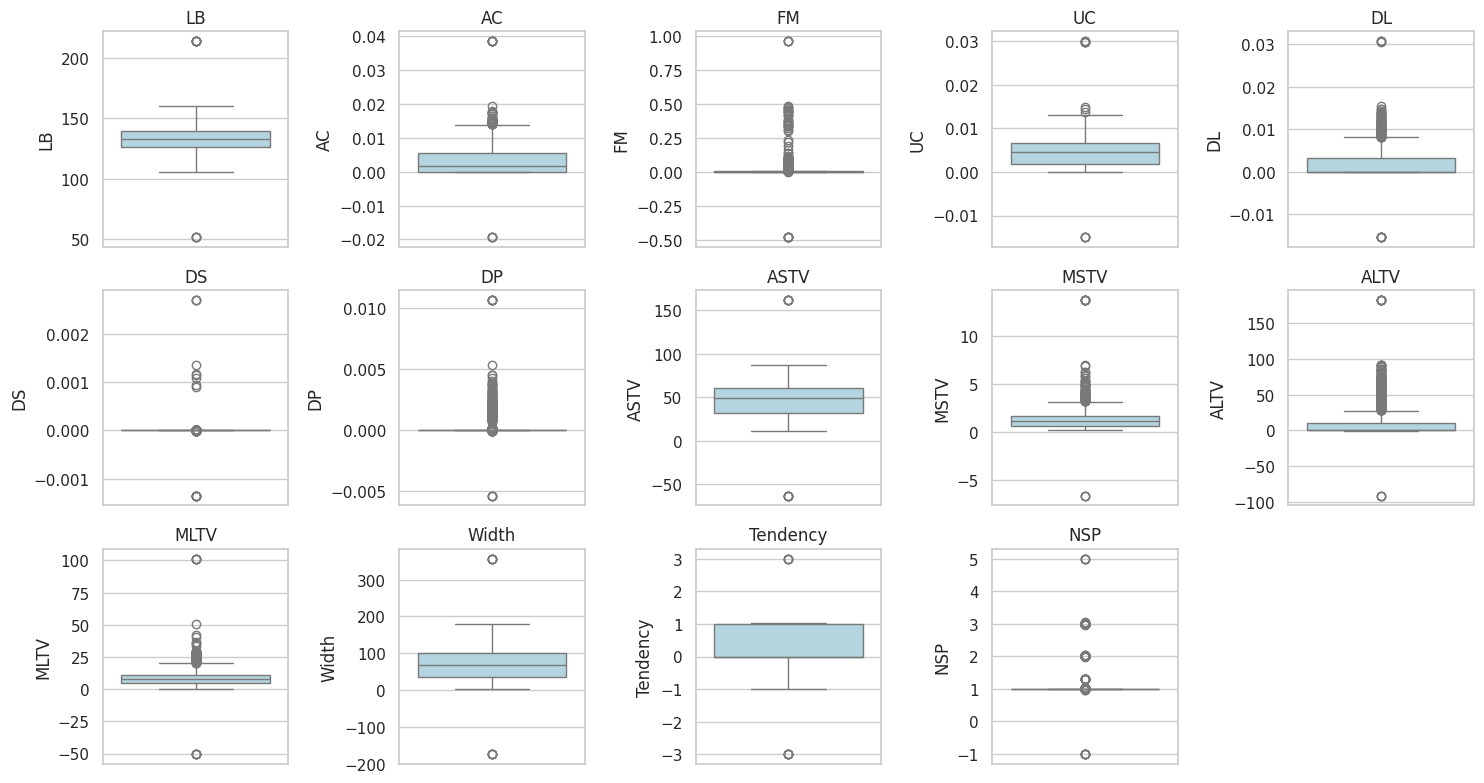

In [9]:
plt.figure(figsize=(15,8))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col)
plt.tight_layout()
plt.show()


Boxplots summarize spread, median, quartiles, and outliers. Clear outliers appear in variability and deceleration features.

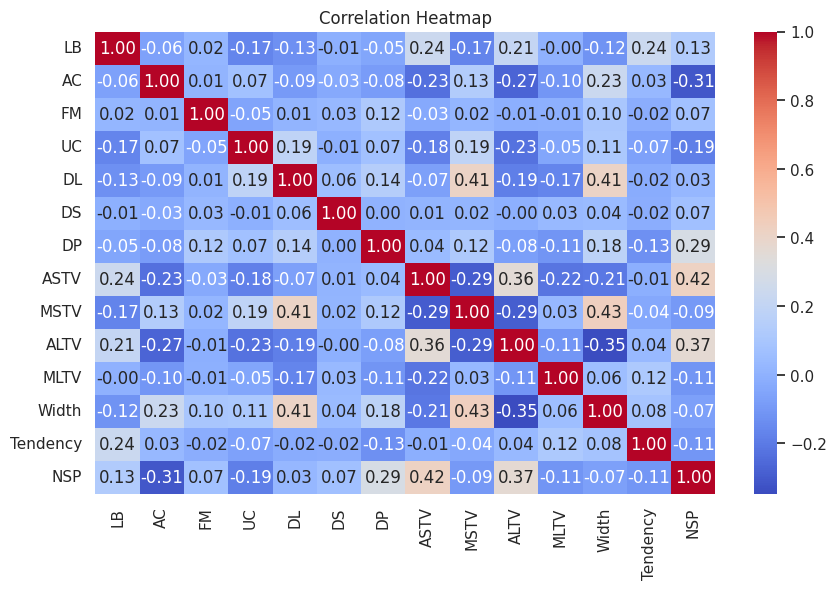

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


ASTV and ALTV show strong correlation, both measuring abnormal variability.

Deceleration features (DL, DS, DP) also correlate with each other.

/tmp/ipython-input-1430450953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="NSP", y="LB", data=df, palette="muted")


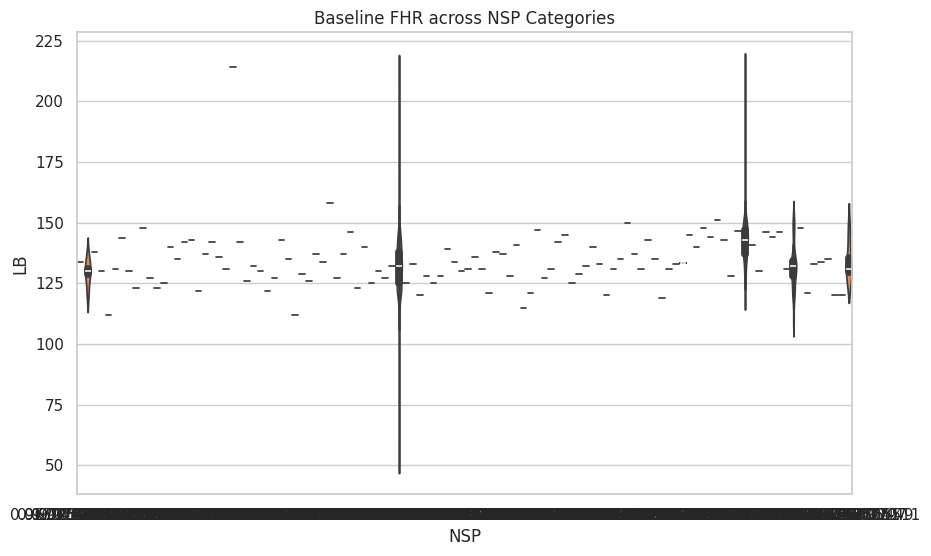

In [11]:
plt.figure(figsize=(10,6))
sns.violinplot(x="NSP", y="LB", data=df, palette="muted")
plt.title("Baseline FHR across NSP Categories")
plt.show()


Violin plots combine boxplots with density curves, showing that baseline heart rate distributions differ across fetal states (NSP).

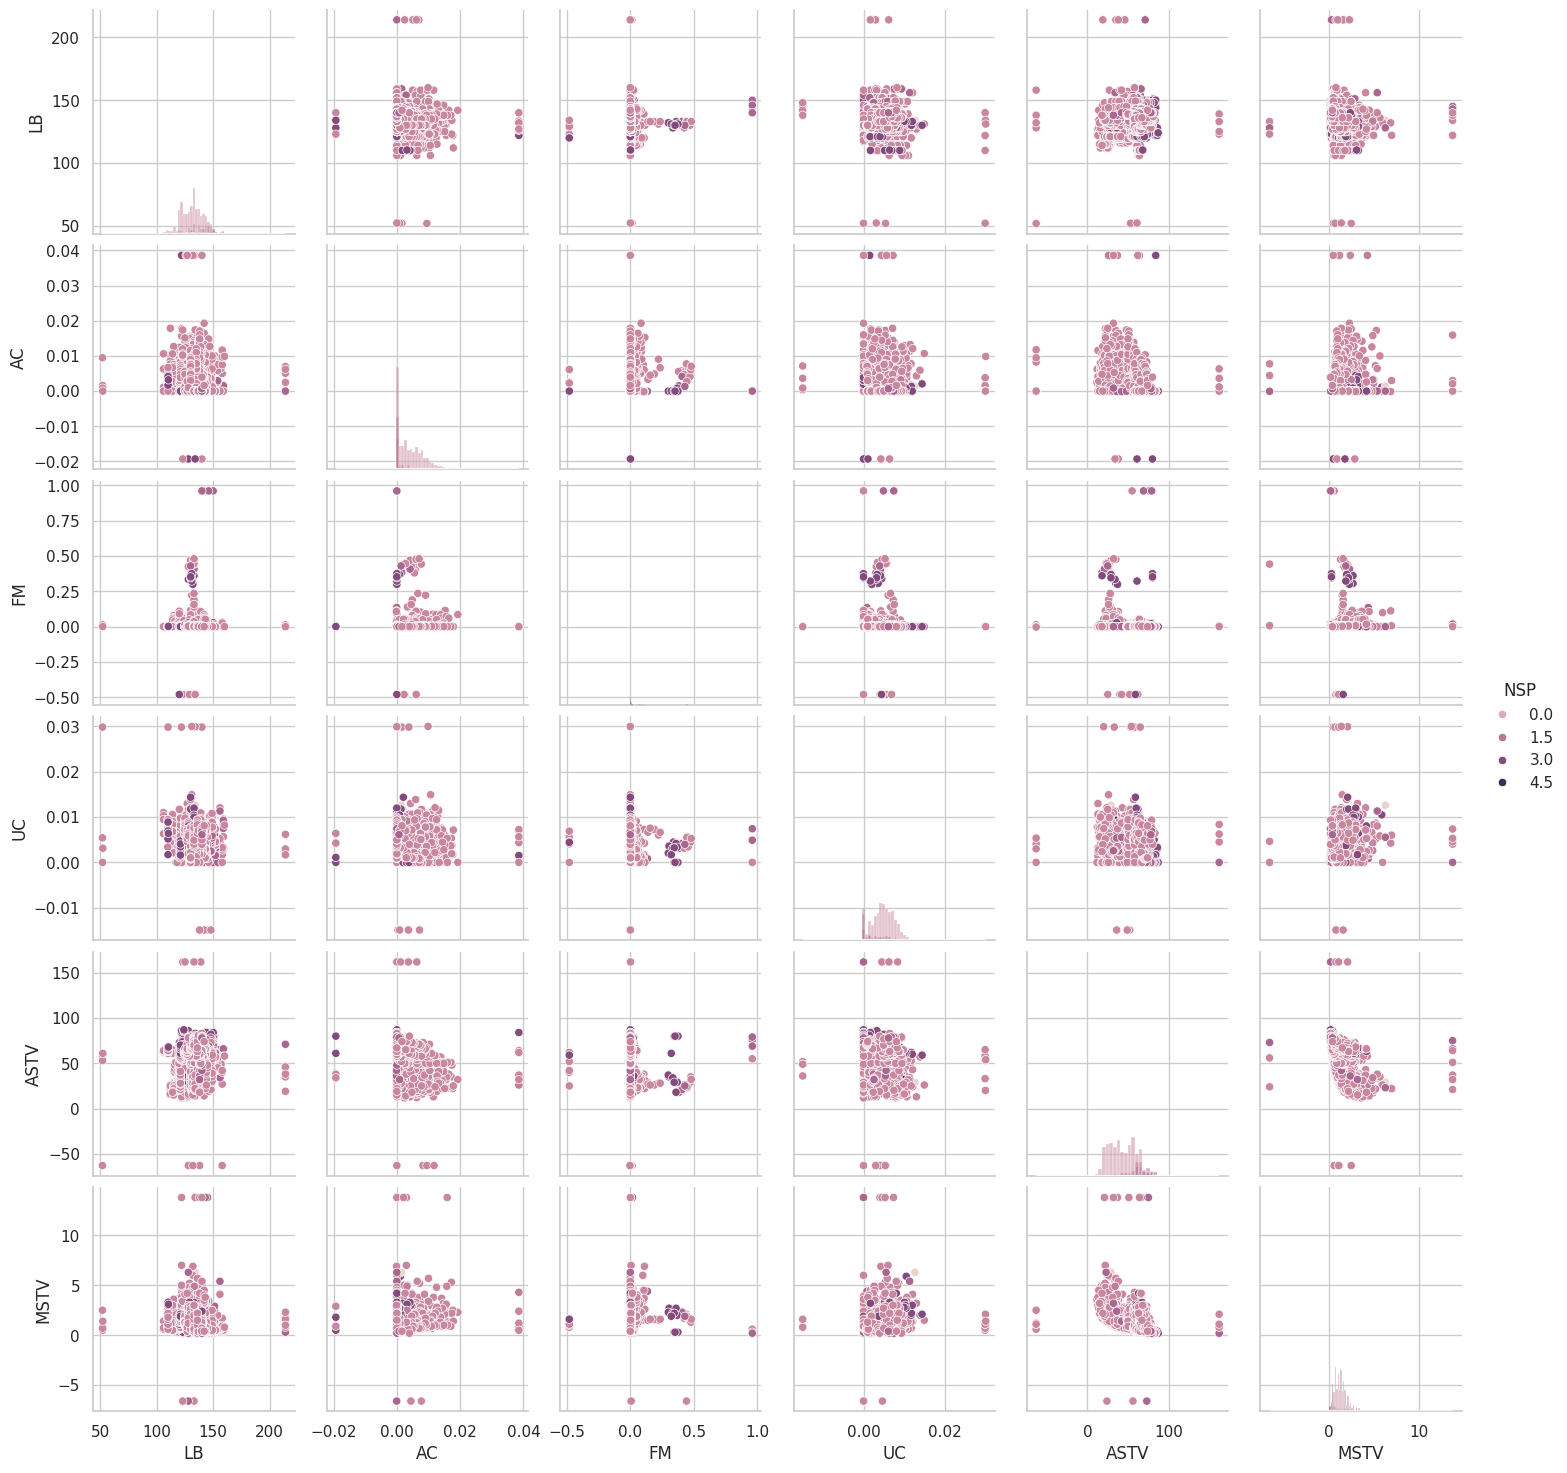

In [12]:
sns.pairplot(df[['LB','AC','FM','UC','ASTV','MSTV','NSP']], hue='NSP', diag_kind="hist")
plt.show()


The dataset is skewed, with many variables containing zeros and few extreme values.

ASTV, ALTV, and deceleration features strongly influence abnormal fetal states.

Outliers are clinically important (signs of distress) and should not be removed blindly.

Correlation analysis revealed overlapping features, which may help in feature selection for predictive modeling.